# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [375]:
# Import Library

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (f1_score, accuracy_score, recall_score,
                             precision_score, confusion_matrix,
                             classification_report, roc_auc_score,
                             precision_recall_curve, roc_curve,make_scorer)

In [376]:
# Load data
df = pd.read_csv('/content/ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [377]:
# check data type & shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observation: There are 4162 entries with 15 attributes. Age, website_visit, time_spent_on_website, page_views_per_visit, status are numeric variable. Among these variable, age & website visit can only take integer value, status are binary variable of 0 and 1, time_spent_on_website is rounded into nearest integer.

In [378]:
# Sanity check: first we look through the data to find out what are the value range, then we perform data cleaning
df.describe().round(2)

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00,4612.00,4612.00,4612.00,4612.00
mean,46.20,3.57,724.01,3.03,0.30
std,13.16,2.83,743.83,1.97,0.46
min,18.00,0.00,0.00,0.00,0.00
25%,36.00,2.00,148.75,2.08,0.00
50%,51.00,3.00,376.00,2.79,0.00
75%,57.00,5.00,1336.75,3.76,1.00
max,63.00,30.00,2537.00,18.43,1.00


Observation: The data has no outlier and unreasonable values

In [379]:
# check duplicates
df.duplicated().sum()

0

Observation: There is no duplicate data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

###**Univariate Analysis**

#### Boxplot & Histogram for numerical variables

In [380]:
def histogram_boxplot(data, feature, figsize=(10, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex = True,
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--" # mean label
    )
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-" # median label
    )

In [381]:
# find all numerical columns
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
num_cols

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'status']

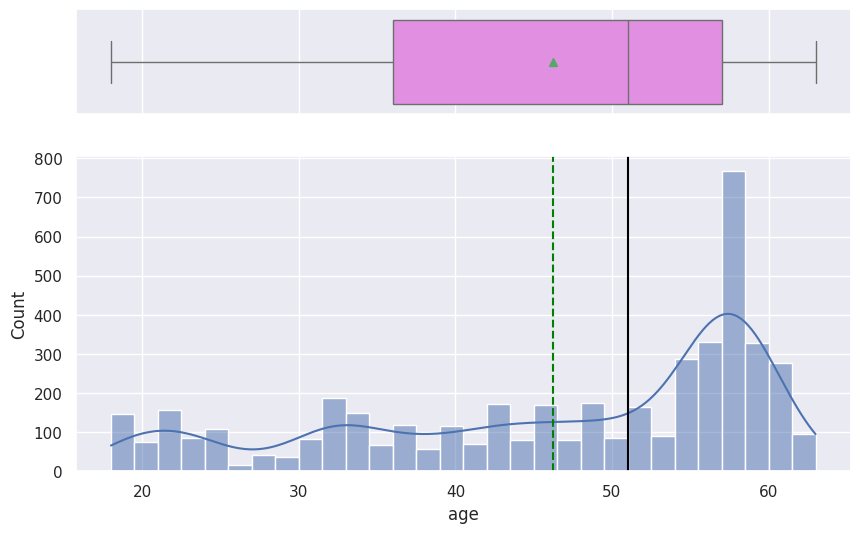

In [382]:
# Age histogram
histogram_boxplot(df, 'age', kde = True, bins = 30)

**Observation** : The age distribution of leads is right-skewed, with a significant concentration of individuals between 50 and 60 years old, suggesting that a large portion of leads comes from an older demographic. There are also smaller peaks in younger age groups, indicating the presence of multiple age clusters. The median age is around 50, with a slightly higher mean of around 51-52.

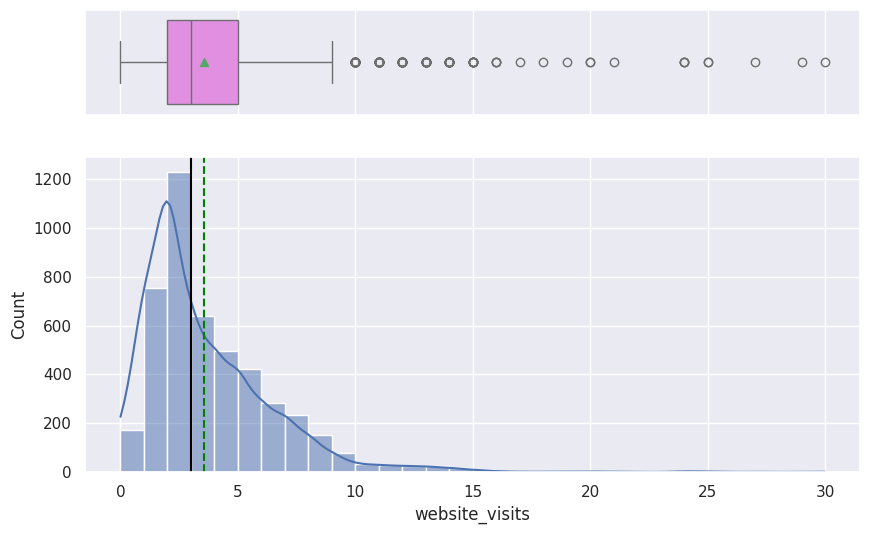

In [383]:
# Web Visit Count histogram
histogram_boxplot(df, 'website_visits', kde = True, bins = 30)

**Observation**: The number of website visits by leads is right-skewed, with most leads visiting the site between 1 to 5 times. The median number of visits is around 3-4, as indicated in the box plot, while a small number of leads have significantly higher visit counts, appearing as outliers beyond 10 visits.

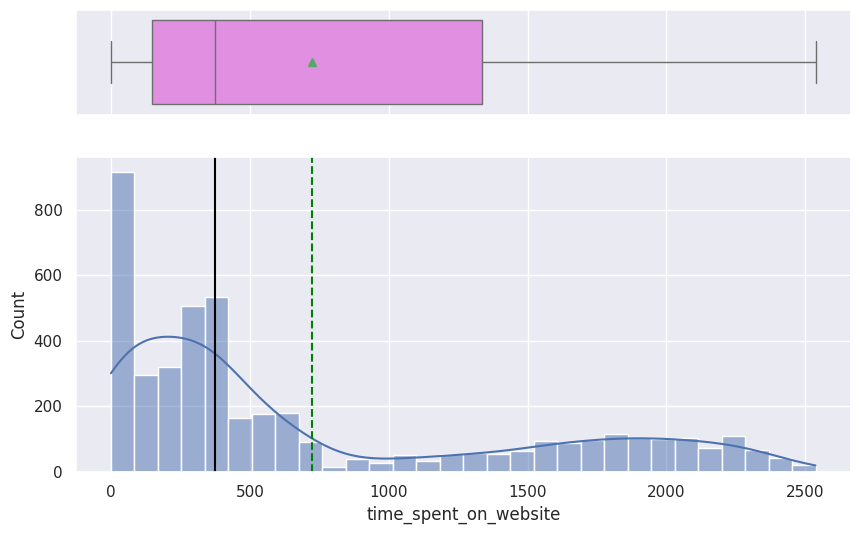

In [384]:
# Time Spent histogram
histogram_boxplot(df, 'time_spent_on_website', kde = True, bins = 30)

**Observation:** Most leads spend less than 500 seconds on the website, but a smaller group stays much longer, creating a right-skewed distribution. The two peaks suggest different browsing behaviors—some visit briefly, while others engage deeply, indicating potential higher conversion interest.

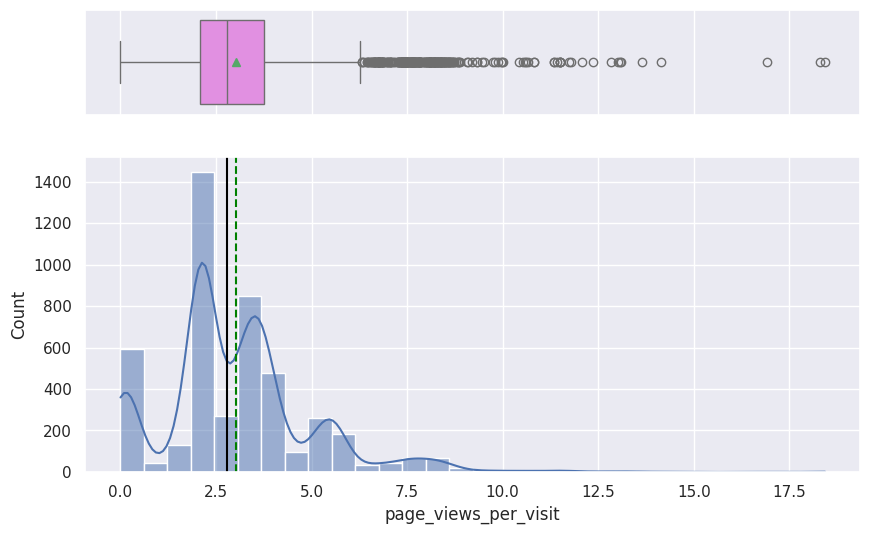

In [385]:
# page views per visit histogram
histogram_boxplot(df, 'page_views_per_visit', kde = True, bins = 30)

**Observation:** Most leads view 1 to 5 pages per visit, with multiple peaks suggesting varied browsing behaviors. A few users browse significantly more, as seen in the numerous outliers, indicating higher engagement and potential conversion interest.

#### Barplot for categorical variables

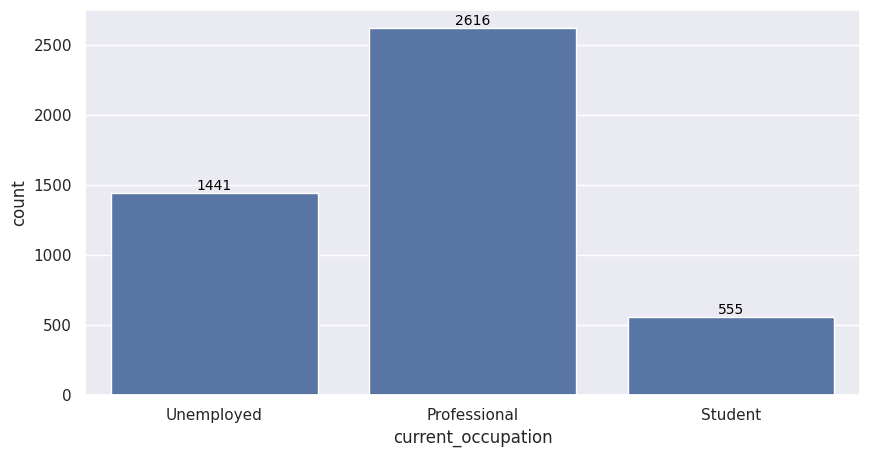

In [386]:
# Occupation of Leads
plt.figure(figsize=(10,5))
ax = sns.countplot(x='current_occupation',data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

**Observation:** Most of the leads are professional workers, while there are not many students participating.

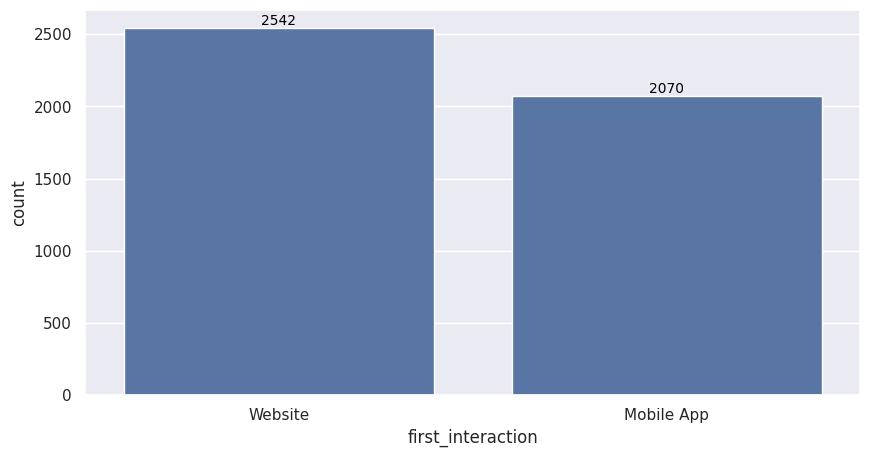

In [387]:
# First interaction
plt.figure(figsize=(10,5))
ax = sns.countplot(x='first_interaction',data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')


**Observation:** The number of leads have the first interaction through website is slightly higher than mobile app. This suggests that website can reach more audience, although both of them are similarly effective.

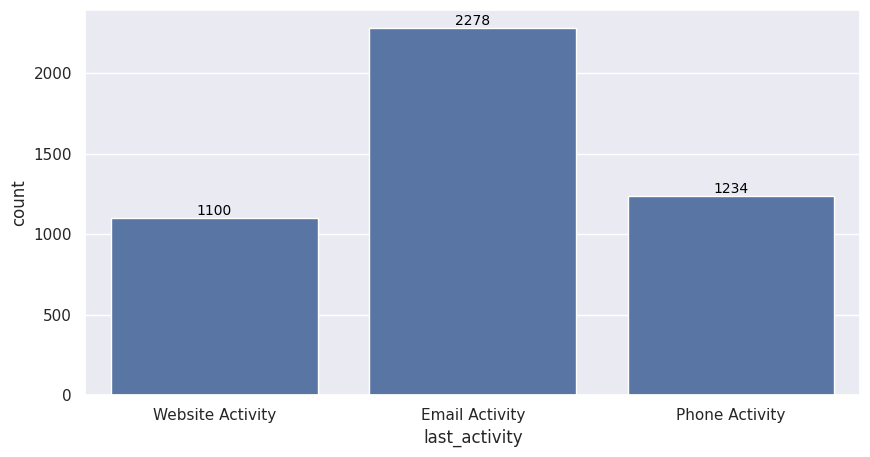

In [388]:
#last activity
plt.figure(figsize=(10,5))
ax = sns.countplot(x='last_activity',data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

**Observation**: Email is the most recent activity of the most leads, which is significantly higher than website and phone activity.

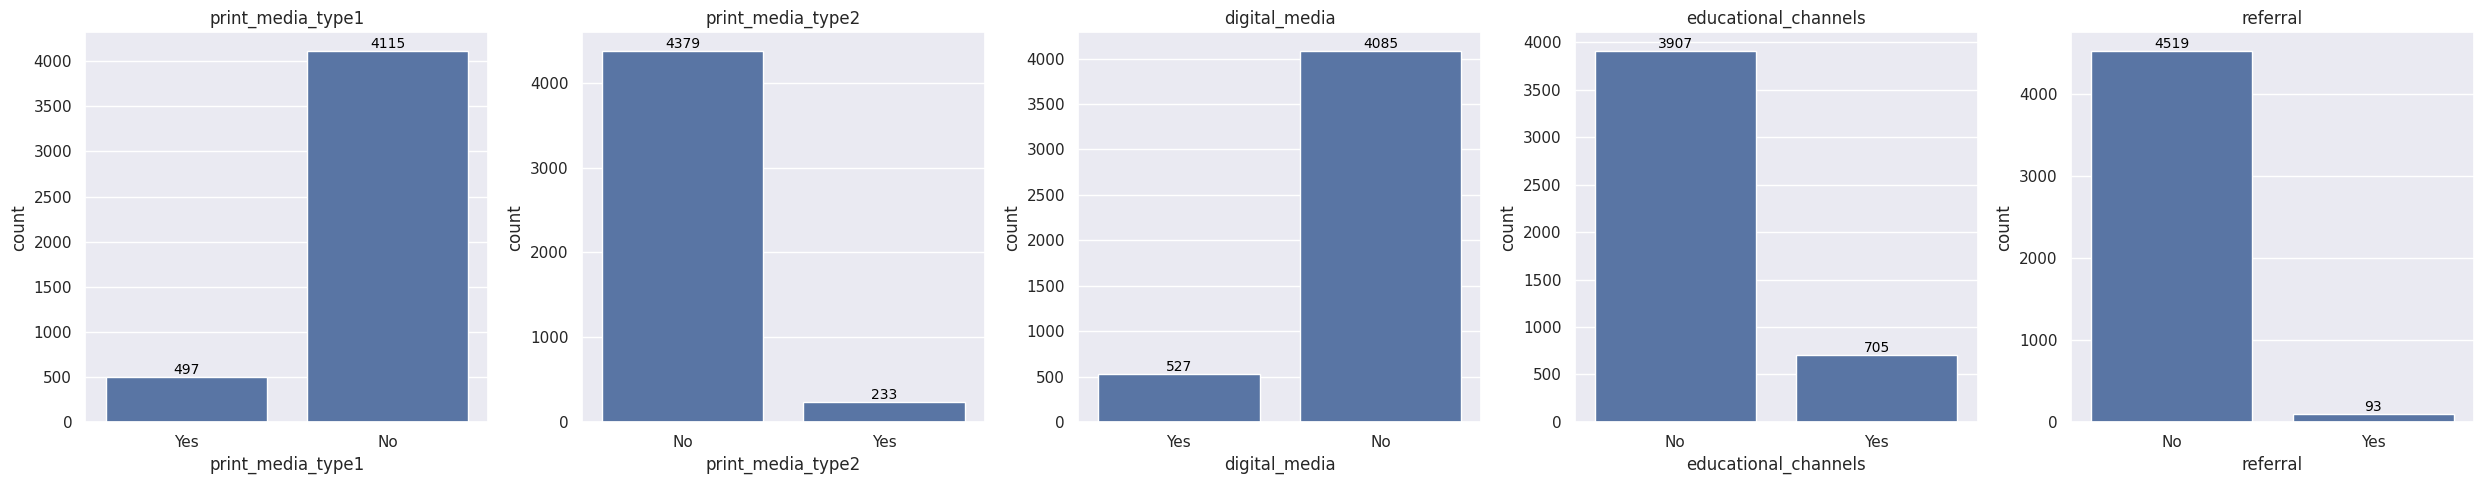

In [389]:
# channel type
channels = ["print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]

fig, axes = plt.subplots(1, len(channels), figsize=(5 * len(channels), 5))


for i, channel in enumerate(channels):
    ax = axes[i]
    sns.countplot(x=channel, data=df, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height + 0.5),  #
                        ha='center', va='bottom', fontsize=10, color='black')

    ax.set_title(channel)

plt.tight_layout()
plt.show()

**Observation:** Most leads come from non-print and non-digital media sources, with print media type 1, digital media, and educational channels contributing more leads than print media type 2 and referrals. Referrals have the lowest lead count, suggesting they might be underutilized despite their high conversion rate.

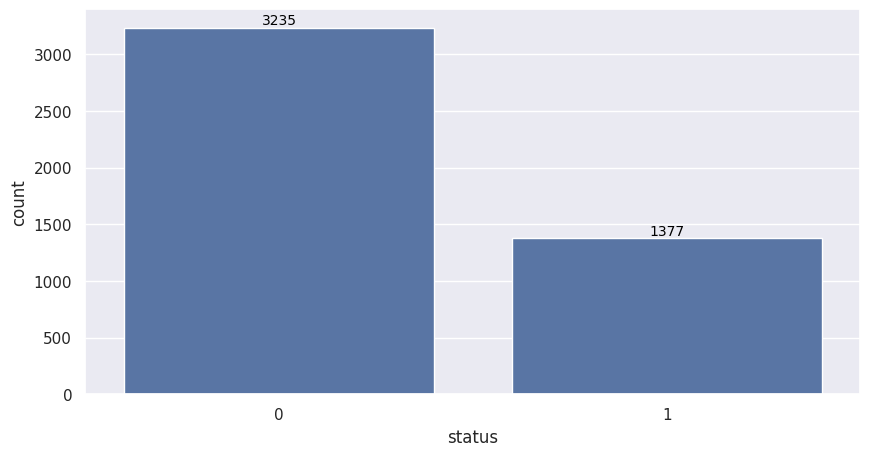

In [390]:
# status
plt.figure(figsize=(10,5))
ax = sns.countplot(x='status',data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

**Observation:** The overall conversion rate is approximately 1377 / 612 = 29.8%, indicating that less than a third of leads successfully convert. While there is a significant drop-off, optimizing high-performing channels like referrals could improve conversions.

###**Bivariate Analysis** (Questions are answered here)

#### **`Current_occupation`** vs **`status`**

status,0,1
current_occupation,,
Professional,1687,929
Student,490,65
Unemployed,1058,383


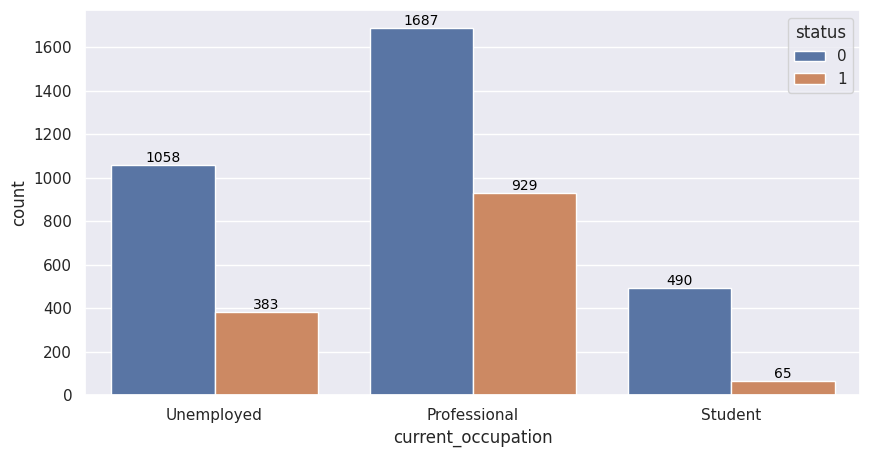

In [391]:
# how current occupation affects lead status.
display(pd.crosstab(df['current_occupation'],df['status']))
ax = sns.countplot(x='current_occupation',hue='status',data=df)
#show the count at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')



##### **Question 1**: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
### 1. Conversion rate:
- Unemployed Lead: 383/(1058 + 383) * 100% = 26.6%
- Professional Lead: 929/(929+ 1687) * 100% = 35.5%
- Student Lead: 65/(65 + 490) * 100% = 11.7%

### 2. Insights:
- Professionals have the highest conversion rate (35.5%) and highest number of paid visitors. This suggests that professionals are more likely to see the course as an investment in their career development and have the financial capacity to enroll.
- The conversion rate of unemployed leads is relatively low (26.6%), indicating potential financial concerns or hesitation about the course’s affordability and perceived value.
- Students have the lowest conversion rate (11.7%) and lowest number of paid users, likely reflecting budget limitations or a lower sense of urgency compared to professionals. Students may perceive the course as less immediately necessary for their current academic stage.

### 3. Takeaways:
- Professionals are the most valuable segment with both the highest volume of leads and the best conversion rate.
- Unemployed individuals convert at a moderate rate but may require more financial reassurance or job-placement guarantees.
- Students present a small market segment with the lowest conversion rate, requiring different strategies like discounts or long-term benefits.

#### **`first_interaction`** vs **`status`**

status,0,1
first_interaction,,
Mobile App,1852,218
Website,1383,1159


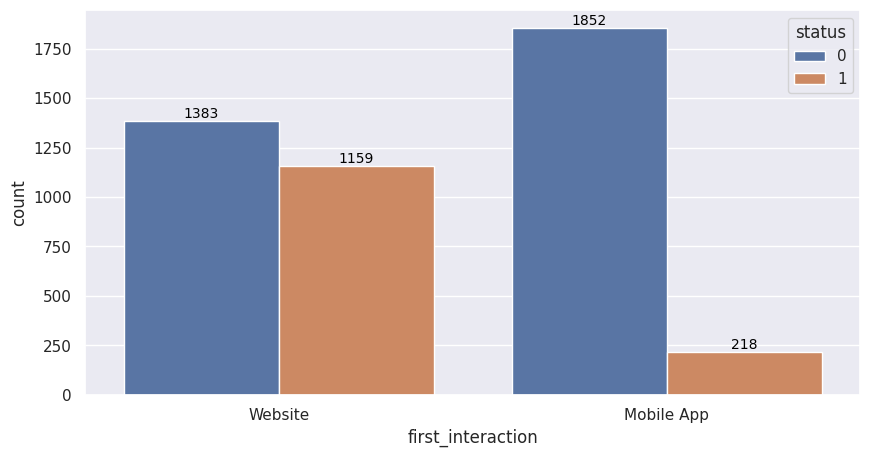

In [392]:
# Do the first channels of interaction have an impact on the lead status?
display(pd.crosstab(df['first_interaction'],df['status']))
ax = sns.countplot(x='first_interaction',hue='status',data=df)
#show the count at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')


##### **Question 2:** The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

### 1. Conversion rate:
- Website: 1159/(1159 + 1383) * 100% = 45.6%
- Mobile App: 218/(218+1852) = 10.5%

### 2. Insights:
- Leads who first interacted through the Website show a high conversion rate (45.6%). This suggests that the website is an effective channel for attracting and converting paying customers.
- Leads whose first interaction was through the Mobile App have a very low conversion rate (10.5%). This suggests that the app is less effective in convincing leads to purchase the course.

### 3. Takeaways:
- Website is a high-performing channel with a strong conversion rate (45.6%). It is likely that the website offers more detailed information, better course presentation, or a smoother purchasing process.
- Mobile App has a low conversion rate (10.5%), indicating a potential issue with user experience or that app users may have different expectations or behaviors.


#### **`last_activity`** vs **`status`**

status,0,1
last_activity,,
Email Activity,1587,691
Phone Activity,971,263
Website Activity,677,423


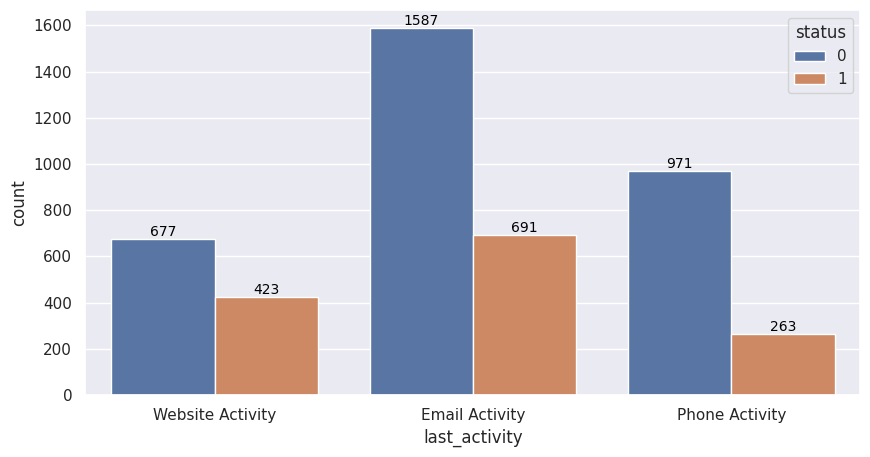

In [393]:
# last activity vs status
display(pd.crosstab(df['last_activity'],df['status']))
ax = sns.countplot(x='last_activity',hue='status',data=df)
#show the count at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

##### **Question 3:** The company uses multiple modes to interact with prospects. Which way of interaction works best?
### 1. Conversion rate:
- Website: 423/(423 + 677) * 100% = 38.5%
- Email: 691/(691 + 1587) = 30.3%
- Phone: 263/(263 + 971) = 21.3%

### 2. Insights:
- Leads whose last activity was on the website show a moderate conversion rate (38.5%). Website activity seems to indicate relatively strong engagement and potential buying intent.
- Email activity leads to a lower conversion rate (30.3%) although having more purchasers. Although email is useful for outreach and nurturing, it may lack the immediate engagement that drives decisions.
- Phone activity results in the lowest conversion rate (21.3%). This suggests that calls alone may not be effective or that calls may often occur when leads are hesitant, requiring more nurturing.

### 3. Takeaways:
- Website Activity is the best-performing channel with the highest conversion rate (38.5%). It shows that Leads interacting with the website tend to be more actively engaged and closer to making a decision.
- Email Activity drives decent conversions (30.3%) but is likely better for nurturing leads over time than immediate conversion.
- Phone Activity has the lowest conversion rate (21.3%), indicating phone calls may be less persuasive or used primarily for colder leads or follow-ups on hesitant prospects.


#### **Impact of channel on conversion rate**

In [394]:
# Display crosstab
from IPython.core.display import display, HTML

channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

html_tables = ""

for channel in channels:
    table_html = pd.crosstab(df[channel], df['status']).to_html()
    html_tables += f'<div style="display:inline-block; padding:10px;">{table_html}</div>'

# Display tables in a single row
display(HTML(f'<div style="display:flex; overflow-x:auto;">{html_tables}</div>'))

status,0,1
print_media_type1,,
No,2897,1218
Yes,338,159
status,0,1
print_media_type2,,
No,3077,1302
Yes,158,75
status,0,1
digital_media,,
No,2876,1209


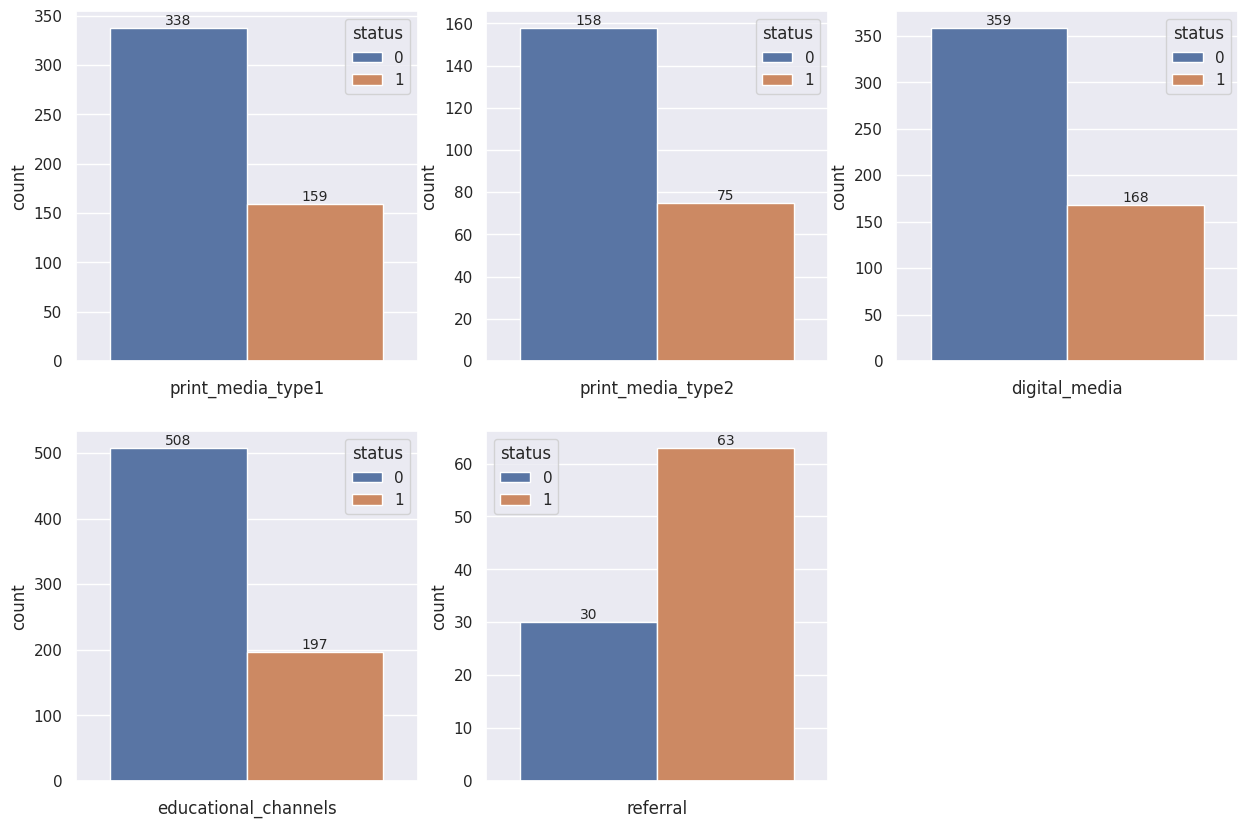

In [395]:
# Draw graph on number of leads using each type of these channel convert or not.
channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
cols = 3
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten() # Flatten axes because it is a 2D array

for i, channel in enumerate(channels):
    ax = axes[i]
    df_filtered = df[df[channel] == 'Yes']
    sns.countplot(x=channel, hue='status', data=df_filtered, ax=ax)
    #show the count at the top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10)
    # Hide x-axis label
    ax.set_xticklabels([])


# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

##### **Question 4:** The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
### 1. Conversion rate:
- Print Media Type 1: 159/(159 + 338) * 100% = 32.0%
- Print Media Type 2: 75/(75 + 158) * 100% = 32.2%
- Digital Media: 168/(168 + 395) * 100% = 31.9%
- Education Channels: 197/(197 + 508) * 100% = 27.9%
- Referral: 63/(30 + 63) * 100% = 67.7%

### 2. Insights:
- The highest conversion rate (67.7%) comes from Referrals although the quantity is small. This indicates that leads obtained through word-of-mouth or recommendations are significantly more likely to convert.
- Print Media, and Digital Media are the main methods of advertising with conversion rates at around 32%, meaning they are relatively effective.
- Educational Channels (27.9%) have the lowest conversion rate, which suggests that while this source brings in leads, they are less likely to convert than those from other channels.

### 3. Takeaways:
- Focus on Referral Programs: Since referrals have the highest conversion rate, the company should invest more in referral programs, offering incentives or discounts for referrals.
- Print & Digital Media Work Well: These channels should be optimized and expanded for lead generation.
- Educational Channels Need Improvement: Since they have the lowest conversion rate, the company should reassess their strategy in this area, perhaps by making educational content more engaging or interactive to increase conversions.


#### **`profile_completed`** vs **`status`**

status,0,1
profile_completed,,
High,1318,946
Low,99,8
Medium,1818,423


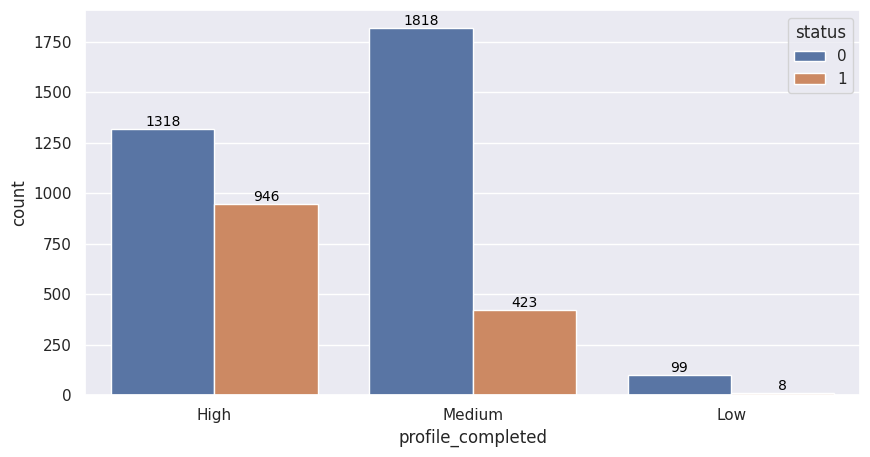

In [396]:
display(pd.crosstab(df['profile_completed'],df['status']))
ax = sns.countplot(x='profile_completed',hue='status',data=df)
#show the count at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

##### **Question 5:** People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?
**Observation:**
### 1. Conversion rate:
- Website: 946/(946 + 1318) * 100% = 41.8%
- Email: 423/(423 + 1818) = 18.9%
- Phone: 8/(8 + 99) = 7.5%

### 2. Insights:
- Leads with high profile completion have the highest conversion rate (41.8%), suggesting that those who invest time into completing their profiles are more serious and more likely to purchase.
- Alhough there are more profile with medium level of completion, leads of this category show a much lower conversion rate (18.9%) compared to those with high profile completion. Partial engagement may indicate lower intent or lack of trust.
- Leads with low profile completion convert poorly (7.5%), indicating that lack of commitment during the profile creation phase correlates with low purchase intent.

### 3. Takeaways:
- Higher profile completion is strongly correlated with higher conversion rates. Prospects with high profile completion convert at 41.8%, more than twice the rate of medium-profile users (18.9%) and significantly higher than low-profile users (7.5%).
- Leads with low profile completion are unlikely to convert, indicating they may lack serious intent or need stronger incentives to engage further.
- Medium-profile users represent a potential opportunity if nurtured properly. They show some intent but require additional push (e.g., targeted follow-ups, reminders).


###**Multivariate Analysis**

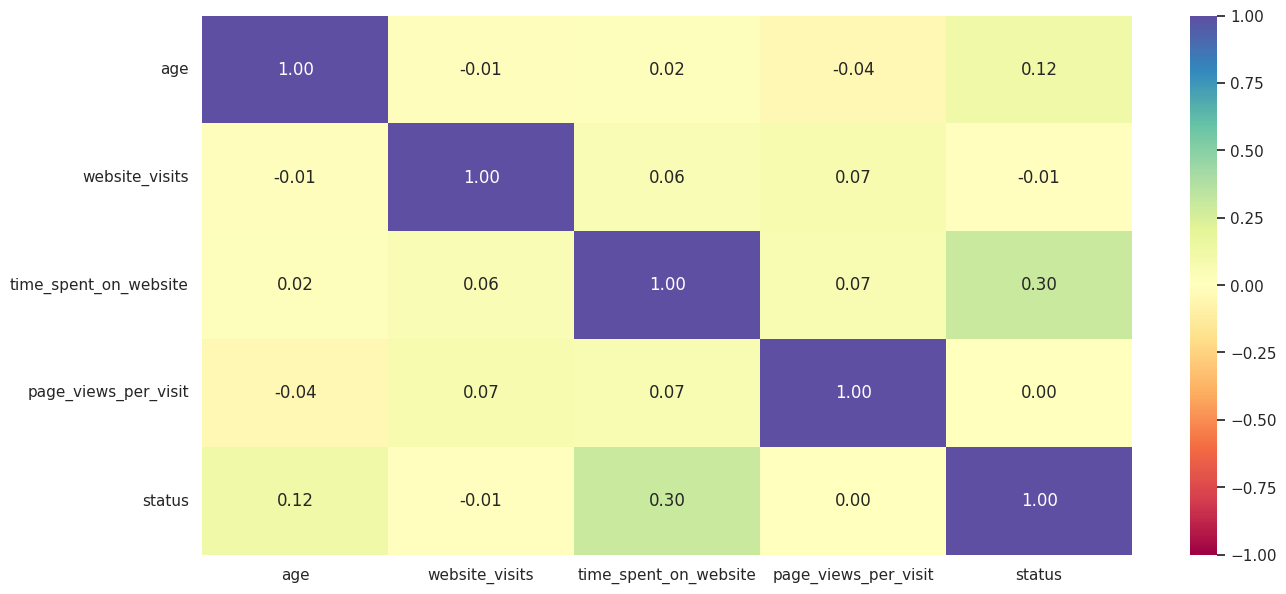

In [397]:
#Multivariate analysis: plot the heat map to observe the correlation
numeric_data = df.select_dtypes(include=np.number)
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation:** The correlation among the numerical variables are very low. This suggests that numerical variable are quite independent of each other, and categorical variable might have more effect on the predictions. Therefore, we might not need to merge any of these numerical variables.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [398]:
data= df.copy()

**Check missing values**

In [399]:
data.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


Observation: The data has no missing values

**Feature engineering:** No need

**Outlier detection and treatment**

In [400]:
# Reusable remove all outlier value
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    #print(lower_bound, upper_bound)

    df = df.loc[(data[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df


In [414]:
data = remove_outlier(data, 'age')
data = remove_outlier(data, 'website_visits')
data = remove_outlier(data, 'time_spent_on_website')
data = remove_outlier(data, 'page_views_per_visit')


**Data Preparation for Model Building**

In [402]:
#drop id
data.drop('ID', axis=1, inplace=True)

In [415]:
#convert categorical variables into dummy/one-hot encoded variables while dropping the first category to avoid multicollinearity
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [416]:
#Prepare X and y
X = data.drop('status', axis = 1)
y = data['status']

In [417]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [418]:
data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,1,False,True,True,False,False,False,True,False,False,False,False,False
5,50,4,212,5.682,0,False,True,False,False,False,True,False,False,False,False,True,False


In [419]:
data.shape

(4197, 17)

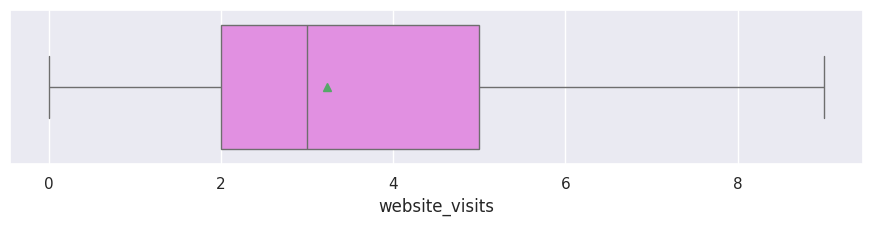

In [420]:
# check if the outlier still exists
plt.figure(figsize=(11, 2))
sns.boxplot(data = data, x = 'website_visits', showmeans = True, color = "violet")
plt.show()

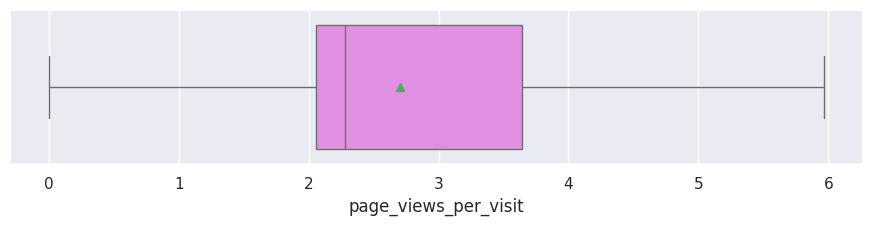

In [421]:
# check if the outlier still exists
plt.figure(figsize=(11, 2))
sns.boxplot(data = data, x = 'page_views_per_visit', showmeans = True, color = "violet")
plt.show()

In [422]:
# check train & test shape
print('X_train shape: ', X_train.shape)
print('X_text shape: ', X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape:  (3357, 16)
X_text shape:  (840, 16)
y_train shape:  (3357,)
y_test shape: (840,)


In [439]:
# model evaluation
def model_eval(model, features, target, type):
    pred = model.predict(features)
    accuracy = accuracy_score(target, pred)
    conf_matrix = confusion_matrix(target, pred)

    print(f'{type} Accuracy: {accuracy:.4f}')

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


## Building a Decision Tree model

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Train Accuracy: 0.8722


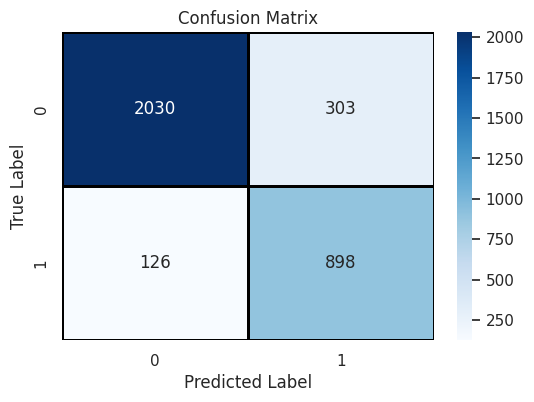

Test Accuracy: 0.8440


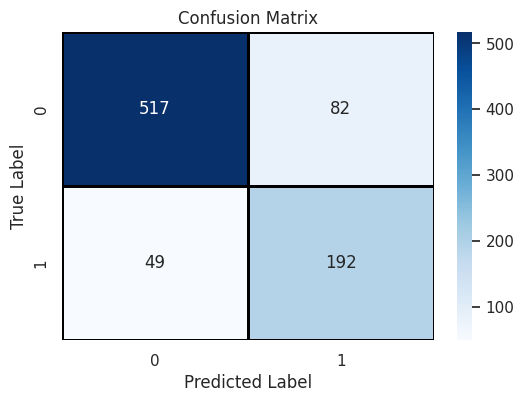

In [440]:
dtree = DecisionTreeClassifier(random_state = 42, class_weight = {0: 0.3, 1: 0.7}) #fine tune the weight to account for class imbalance

param_grid = {
    'max_depth': [None, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')
best_dtree = grid_search.best_estimator_

model_eval(best_dtree, X_train, y_train, 'Train')
model_eval(best_dtree, X_test, y_test, 'Test')


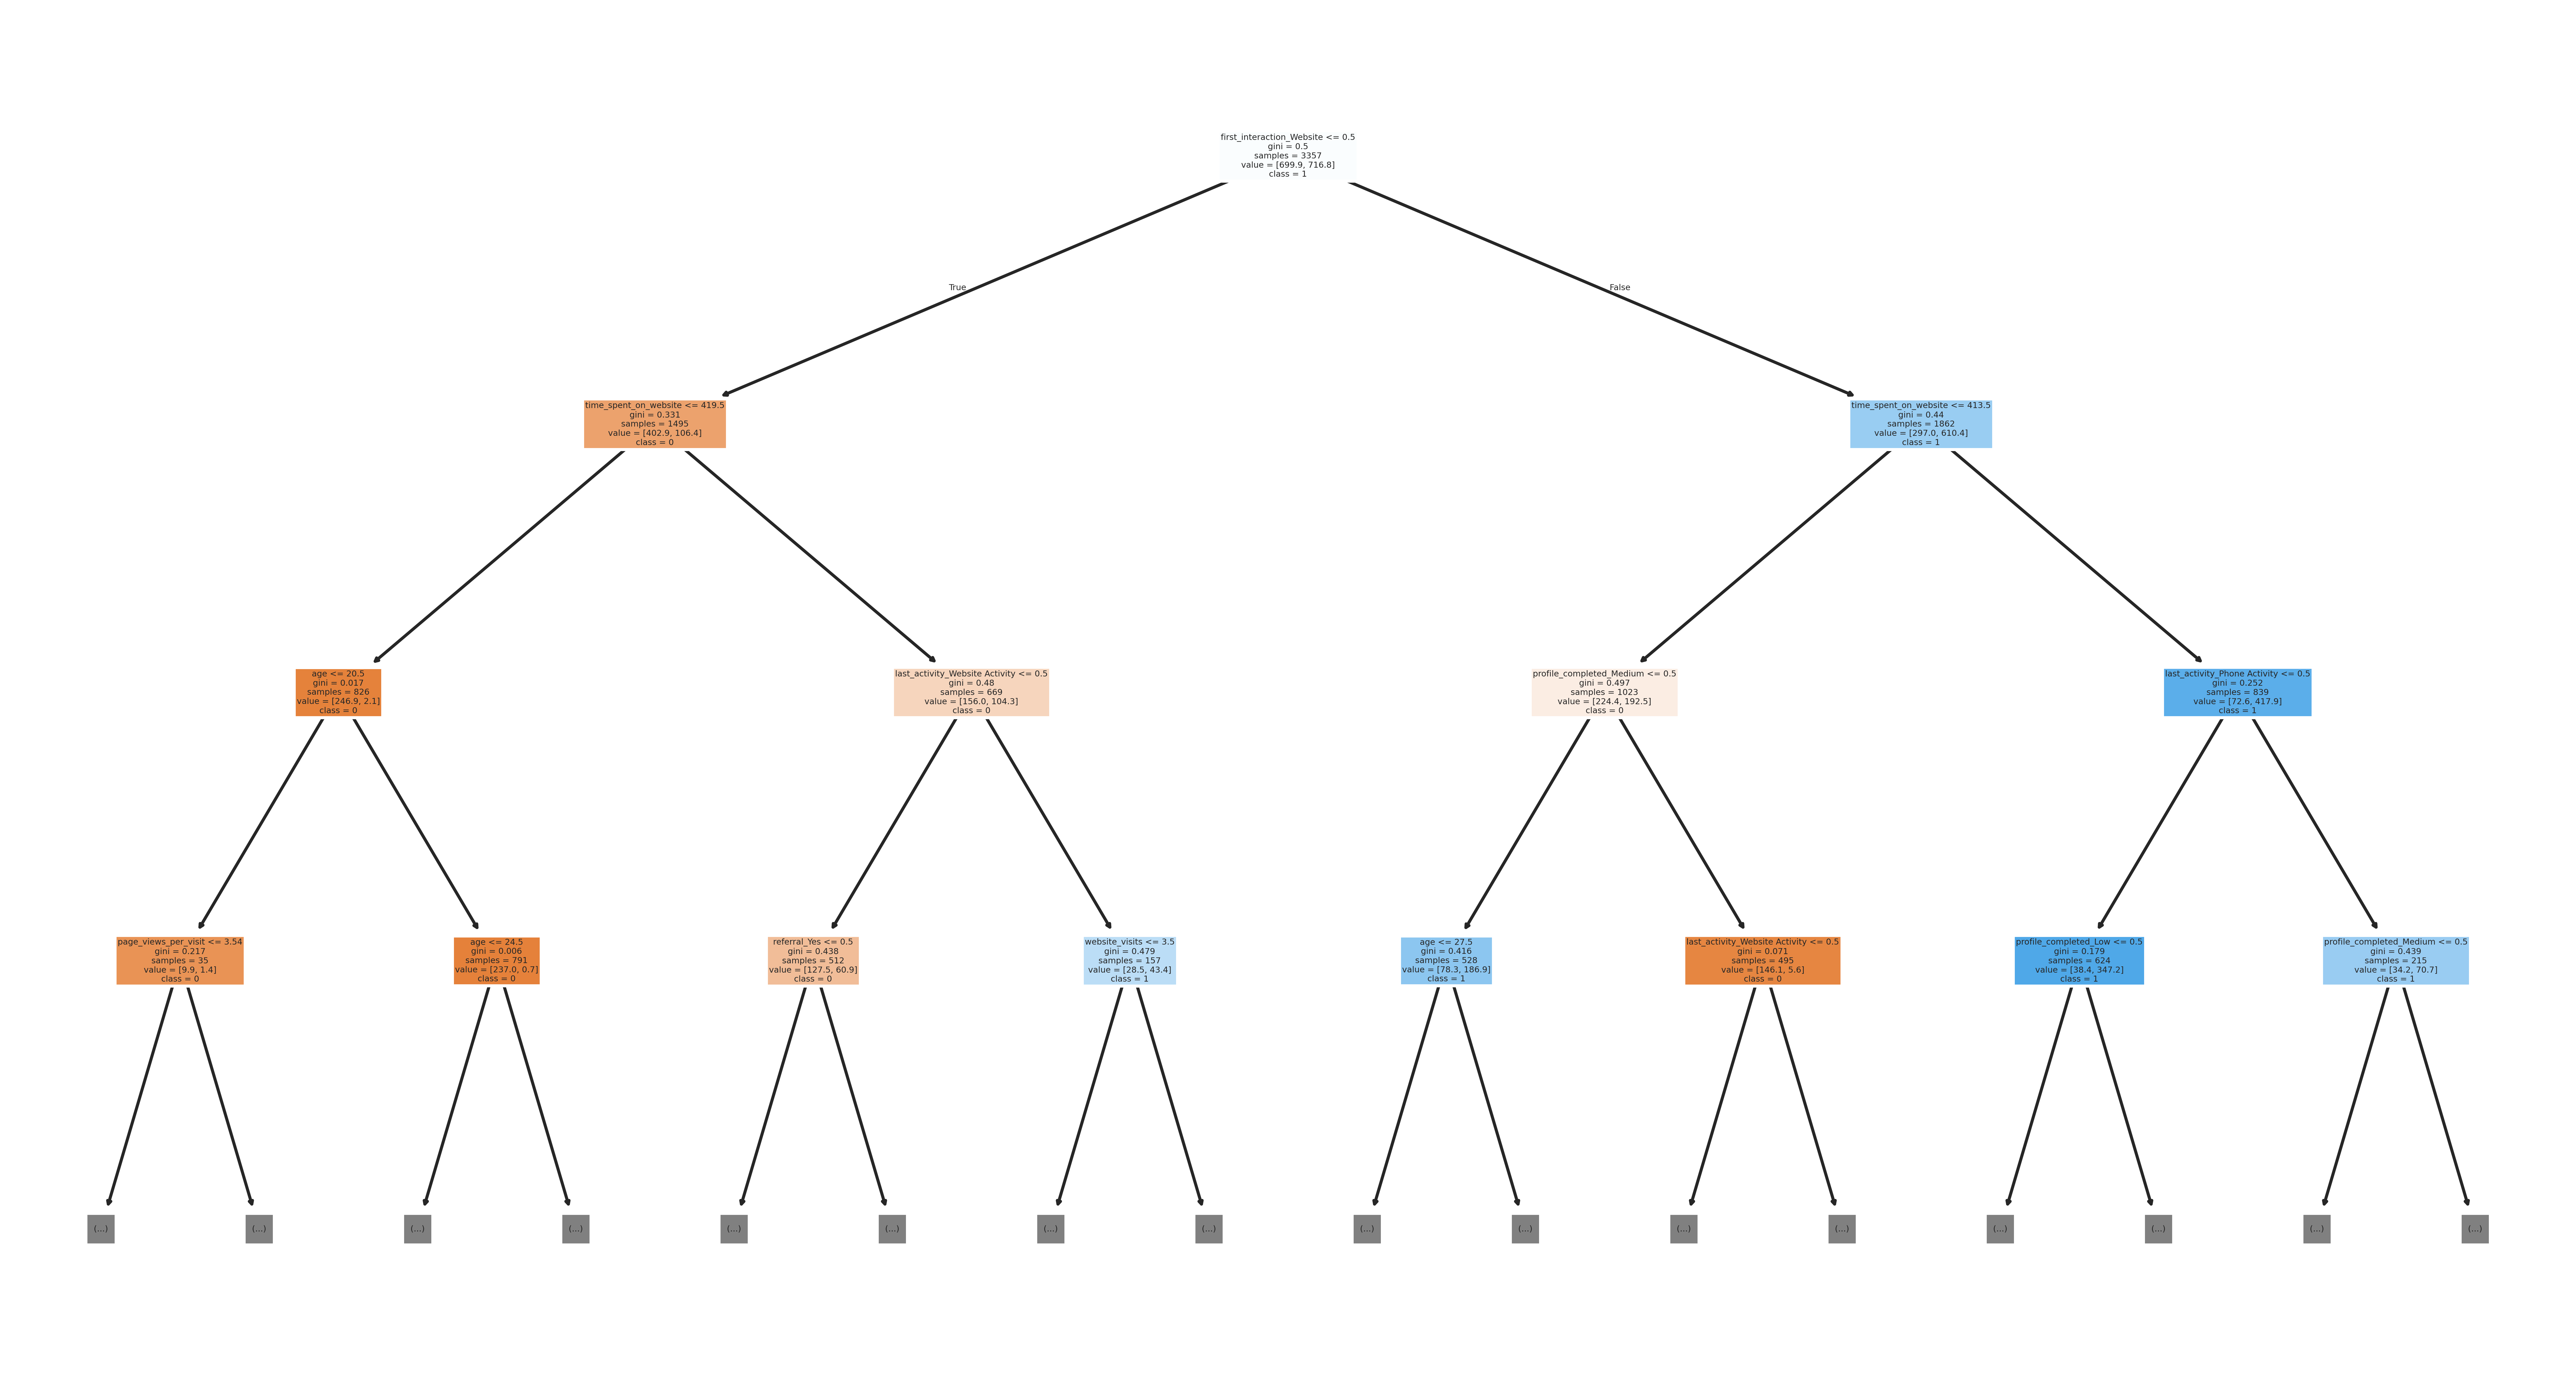

In [438]:
from sklearn import tree
plt.figure(figsize=(15, 8), dpi=800)
tree.plot_tree(best_dtree,
          feature_names=X.columns,
          class_names=['0', '1'],
          filled=True,
          max_depth=3
);  # Show only first 3 levels due to the big tree

plt.show()
# plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')


## Do we need to prune the tree?

Do not need to prune the tree, since the depth is < 10, and the accuracy on thew test set suggest that there is no overfitting.

## Building a Random Forest model

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: RandomForestClassifier(max_depth=7, max_samples=0.9, min_samples_leaf=2,
                       n_estimators=50, random_state=42)
Training Accuracy: 0.8805


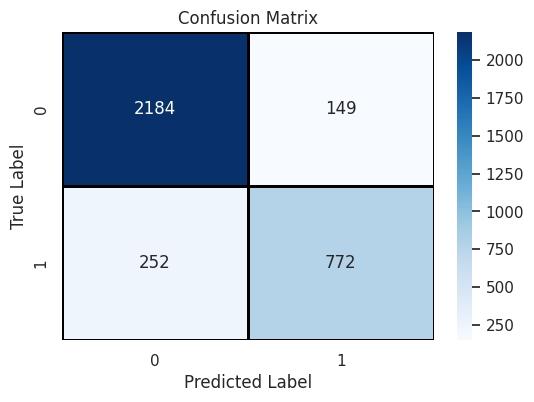

Test Accuracy: 0.8726


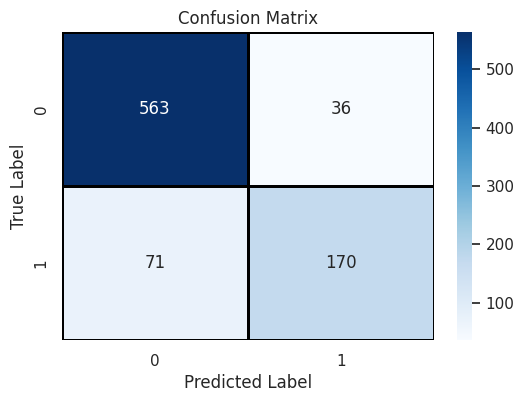

In [445]:
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
parameters = {
    "n_estimators": [10, 50, 100],
    "max_depth": [6, 7],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 5, 10],
    "max_samples": [0.9, 1],
    "criterion": ['gini', 'entropy']
}


# Perform Grid Search with 5-Fold Cross-Validation
grid = GridSearchCV(estimator=rf,
                        param_grid=parameters,
                        scoring=scorer,
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

# Fit the model
grid.fit(X_train, y_train)

# Save the best estimator
best_params_rf = grid.best_estimator_
print(f'Best parameters: {best_params_rf}')
best_rf = grid.best_estimator_


model_eval(best_rf, X_train, y_train, "Training")
model_eval(best_rf, X_test, y_test, "Test")

## Do we need to prune the tree?

No need to prune: the test set accuracy shows that there is no overfit, and model is able to generalize well

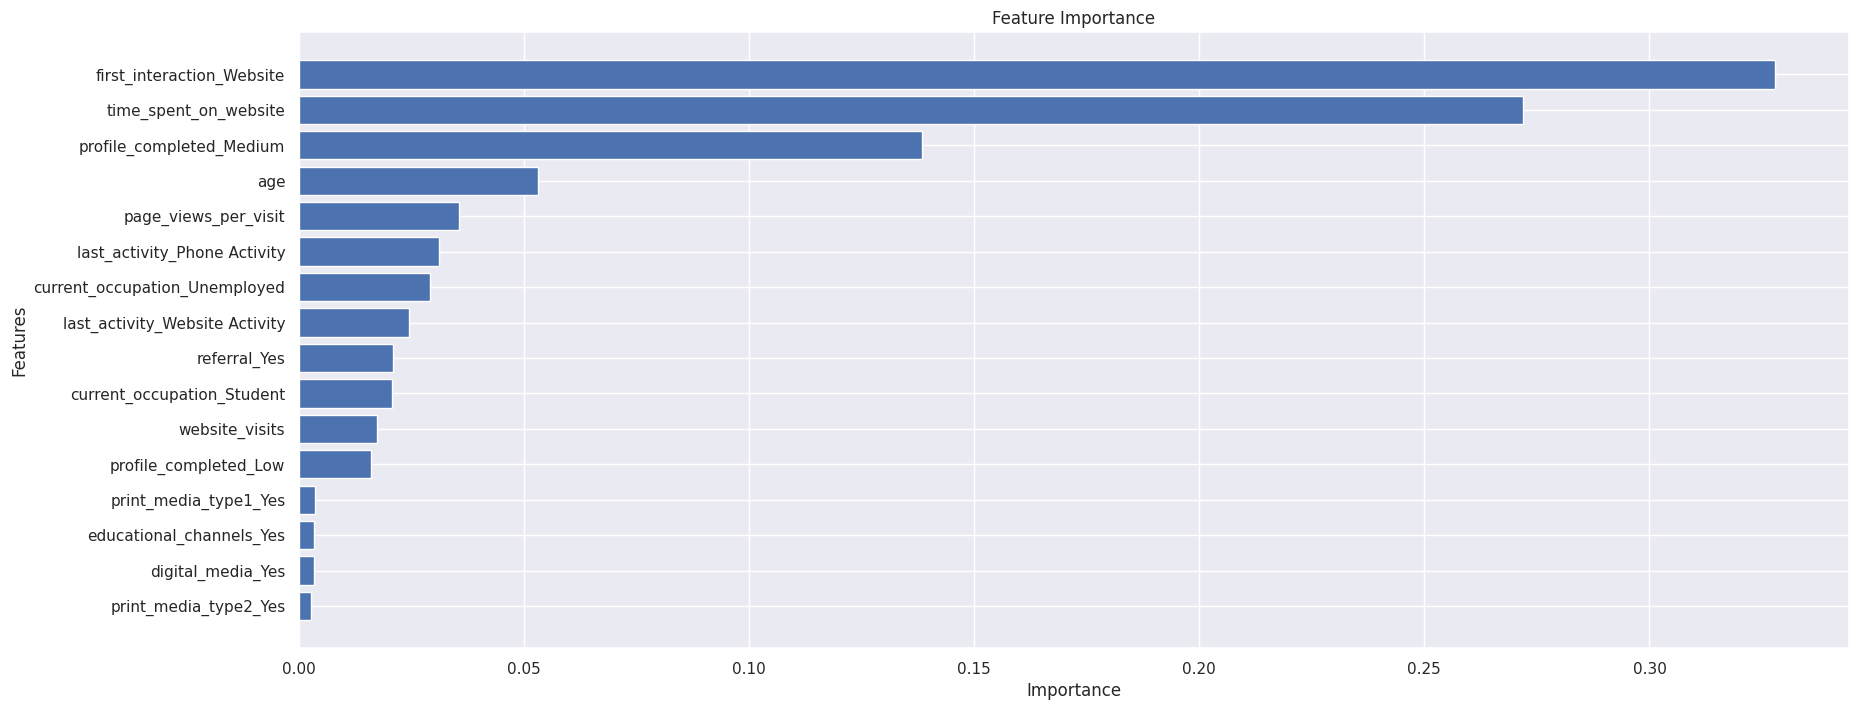

In [449]:
# check feature inportance of the model
importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances with horizontal bars
plt.figure(figsize=(20, 8))
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


## Actionable Insights and Recommendations

#### **1. Lead Conversion Optimization**
a. **Findings**
- Profile Completion Rate significantly affects conversion.
- Users from referral sources have a higher conversion rate than digital media users.
- Leads who engage longer on the website tend to convert better.

b. **Actionable Insights & Recommendations**
- Encourage Profile Completion: Users with completed profiles convert at a higher rate.
  + Implement reminders or incentives (e.g., discount codes or exclusive content) to complete profiles.
  + Use a progress bar to show users how close they are to completion.
- Focus on Referral Programs: Since referral users convert at a higher rate, double down on referral marketing.
  + Offer incentives for successful referrals (e.g., discounts, points, early access).
  + Track and reward top referrers to encourage long-term engagement.
- Engagement-Based Follow-Ups: Users spending more time on the website but not converting may need personalized outreach.
  + Use chatbots or AI-driven nudges to engage them in real-time.
  + Retarget these users with customized email sequences or remarketing ads.

#### **2. Marketing Channel**
a. **Findings**
- Digital Media has higher traffic but lower conversion..
- Print Media Type 1 outperforms Print Media Type 2.
- Educational channels have high engagement but low conversion rates.

b. **Actionable Insights & Recommendations**
- Reallocate Budget to High-Performing Channels
  + If referral-based and Print Media Type 1 bring high conversion rates, increase ad spend on these channels.
  + Reduce spending on low-performing digital media channels and shift it to high-impact strategies.
- Optimize Digital Media Conversions
  + High traffic but low conversion suggests a content gap. Test different landing page designs & add interactive elements like calculators, chatbots, or videos to increase engagement.
  + Use A/B Testing to improve conversion rates for digital media traffic.
- Enhance Educational Channel Effectiveness
  + Leads from educational channels engage more but don’t convert.
  + Adjust content strategy, can offer discount/more targeted campaign.

### **3. User Engagement & Behavior Analysis**
a. **Findings**
- Users with high page views per visit are more likely to convert.
- Exit pages indicate where users drop off before completing an action.
- Returning visitors have a higher conversion rate than first-time visitors.

b. **Actionable Insights & Recommendations**
-  Improve Landing Page Retention
  + Optimize content to keep users engaged longer.
  + Clearer guide fpr user toward conversion.
-  Retarget Returning Visitors
  + Use limited-time offers or exclusive benefits to convert them faster.
  + Email sequences or retargeting ads to bring them back.
- Personalized User Journey Mapping
  +  Implement dynamic website personalization (e.g., show tailored offers or messages).
  + Use session recording tools to analyze user navigation patterns.

### **4. Campaign Personalization & Audience Segmentation**

a. **Findings:**
*   The majority of users are middle-aged (50-60 years old)*, with a **mean age of 50 and a median around that range.
*   Occupation affects engagement behavior: Some professional groups convert better than others.
*   First-time visitors behave differently from repeat visitors.

b. **Actionable Insights & Recommendations:**

- Segment Email & Ad Campaigns by User Behavior
  + New visitor: Show educational content & brand credibility.  
  + Returning visitors: Show personalized product recommendations or retargeting ads.

- Demographic-Based Targeting  
  + Since the majority of users are in the 50-60 age range, tailor marketing messages, visuals, and content to resonate with middle-aged professionals.  
  + If certain occupations convert more, create specific landing pages or offer for them.


